In [3]:
%matplotlib notebook 

import json
import os
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#compute shortest lenght across runs
def min_length(path, folder_name, parameter, n_runs, algorithm):

    lengths = []

    for run in range(n_runs):

        subfolder_name = 'res_{}_{}_{}'.format(algorithm, parameter, run+1)
       
        with open(os.path.join(path, folder_name, subfolder_name, 'results.json')) as f:

            data = json.load(f)

        f.close()

        lengths.append(len(data['avg_loss']))

    return min(lengths)

def averaged_res(path, folder_name, parameter, n_runs, min_length, algorithm):

    for run in range(n_runs):
    
        subfolder_name = 'res_{}_{}_{}'.format(algorithm, parameter, run+1)
       
        with open(os.path.join(path, folder_name, subfolder_name, 'results.json')) as f:

            data = json.load(f)

        f.close()

        if run+1 == 1:
            
            loss = np.asarray(data['avg_loss'])[:min_length]
            
            try:
                test = np.asarray(data['test_loss'])[:min_length]
            except:
                test = np.asarray(data['test_acc'])[:min_length]
            
            tot_time = np.asarray(data['tot_time'])

        else:

            loss += np.asarray(data['avg_loss'])[:min_length]
            
            try:
                test += np.asarray(data['test_loss'])[:min_length]
            except:
                test += np.asarray(data['test_acc'])[:min_length]
           
            tot_time += np.asarray(data['tot_time'])

    return loss/n_runs, tot_time/n_runs, test/n_runs


In [86]:
#define parameters
data = 'fashion'
path = '../results'
snap_sec = 150
n_runs = 5
lr_s = [0.1, 0.01, 0.001]
cg_iterations = [10, 5, 3, 2]
loc=leg_location = 3
y_range = (10**-2, 10**1)
epochs_range = (0, 10)
sec_range = (0, 250)
save = False

<IPython.core.display.Javascript object>


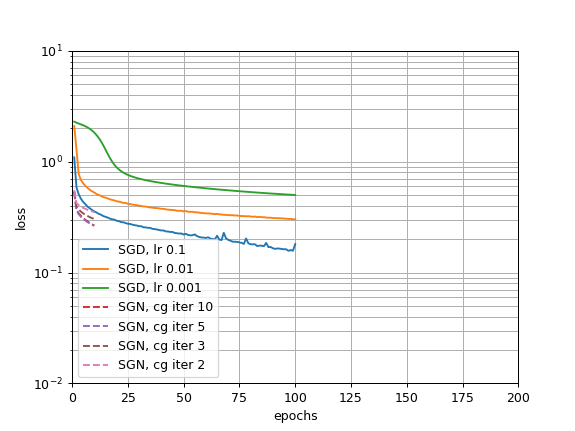

<IPython.core.display.Javascript object>


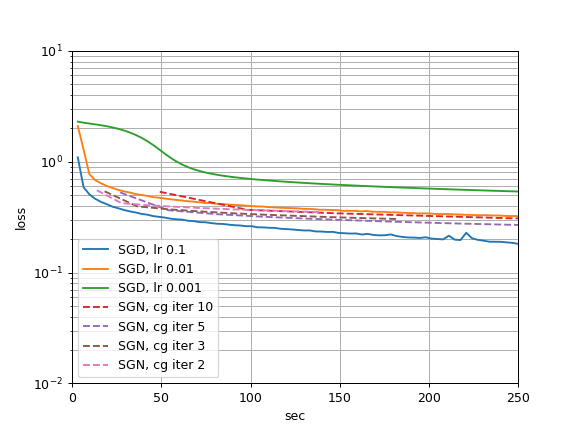

<IPython.core.display.Javascript object>


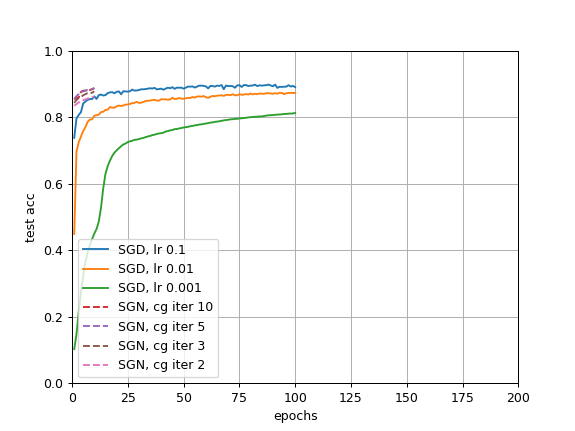

<IPython.core.display.Javascript object>


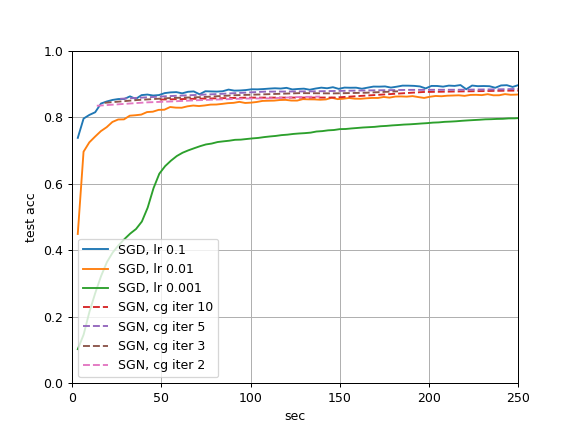

sgd 0.1 test acc 0.8856999999999999, epoch 46, time 149.36136028003693
sgd 0.01 test acc 0.8548399999999999, epoch 46, time 148.715727891922
sgd 0.001 test acc 0.7646400000000001, epoch 46, time 149.9749892539978
sgn 10 test acc 0.8596600000000001, epoch 3, time 147.44825757980348
[ 49.14941919  98.29883839 147.44825758 196.59767677 245.74709597
 294.89651516 344.04593435 393.19535355 442.34477274 491.49419193]
sgn 5 test acc 0.8782, epoch 5, time 134.83921225070952
[ 26.96784245  53.9356849   80.90352735 107.8713698  134.83921225
 161.8070547  188.77489715 215.7427396  242.71058205 269.6784245 ]
sgn 3 test acc 0.87206, epoch 8, time 146.0707530593872
[ 18.25884413  36.51768826  54.7765324   73.03537653  91.29422066
 109.55306479 127.81190893 146.07075306 164.32959719 182.58844132]
sgn 2 test acc 0.8624, epoch 10, time 138.90862646102906
[ 13.89086265  27.78172529  41.67258794  55.56345058  69.45431323
  83.34517588  97.23603852 111.12690117 125.01776381 138.90862646]


In [87]:
plt.figure(1)
plt.figure(2)
plt.figure(3)
plt.figure(4)

for lr in lr_s:
    #compute min common lenght
    length_sgd = min_length(path, data, lr, n_runs, 'SGD')
    sgd_loss, sgd_time, sgd_testloss = averaged_res(path, data, lr, n_runs, length_sgd, 'SGD')
    sgd_epochs = np.asarray(range(1, len(sgd_loss)+1))
    sgd_time_per_epoch = sgd_epochs*(sgd_time/len(sgd_loss))
    plt.figure(1)
    plt.plot(sgd_epochs, sgd_loss, label='SGD, lr {}'.format(lr))
    plt.figure(2)
    plt.plot(sgd_time_per_epoch, sgd_loss, label='SGD, lr {}'.format(lr))
    plt.figure(3)
    plt.plot(sgd_epochs, sgd_testloss, label='SGD, lr {}'.format(lr))
    plt.figure(4)
    plt.plot(sgd_time_per_epoch, sgd_testloss, label='SGD, lr {}'.format(lr))
    if data in ['mnist', 'fashion', 'cifar10']:
        idx = int(snap_sec/(sgd_time/len(sgd_loss)))
        print('sgd {} test acc {}, epoch {}, time {}'.format(lr, sgd_testloss[idx-1], idx, sgd_time_per_epoch[idx-1]))
for cg_iter in cg_iterations:
    #compute min common lenght
    length_sgn = min_length(path, data, cg_iter, n_runs, 'SGN')
    sgn_loss, sgn_time, sgn_testloss = averaged_res(path, data, cg_iter, n_runs, length_sgn, 'SGN')
    sgn_epochs = np.asarray(range(1, len(sgn_loss)+1))
    sgn_time_per_epoch = sgn_epochs*(sgn_time/len(sgn_loss))
    plt.figure(1)
    plt.plot(sgn_epochs, sgn_loss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(2)
    plt.plot(sgn_time_per_epoch, sgn_loss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(3)
    plt.plot(sgn_epochs, sgn_testloss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    plt.figure(4)
    plt.plot(sgn_time_per_epoch, sgn_testloss, label='SGN, cg iter {}'.format(cg_iter), linestyle='dashed')
    if data in ['mnist', 'fashion', 'cifar10']:
        idx = int(snap_sec/(sgn_time/len(sgn_loss)))
        print('sgn {} test acc {}, epoch {}, time {}'.format(cg_iter, sgn_testloss[idx-1], idx, sgn_time_per_epoch[idx-1]))
    
plt.figure(1)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
plt.ylim(y_range)
plt.xlim(epochs_range)
if save:
    plt.savefig('{}_loss_epochs.svg'.format(data), format='svg', dpi=1200)


plt.figure(2)
plt.xlabel('sec')
plt.ylabel('loss')
plt.yscale('log')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
plt.ylim(y_range)
plt.xlim(sec_range)
if save:
    plt.savefig('{}_loss_time.svg'.format(data), format='svg', dpi=1200)


plt.figure(3)
plt.xlabel('epochs')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
if data in ['boston', 'sine_10', 'sine_100']:
    plt.ylabel('test loss')
    plt.ylim(y_range)
    plt.xlim(epochs_range)
    plt.yscale('log')
    if save:
        plt.savefig('{}_testloss_epochs.svg'.format(data), format='svg', dpi=1200)
else:
    plt.ylabel('test acc')
    plt.ylim((0,1))
    plt.xlim(epochs_range)
    if save:
        plt.savefig('{}_testacc_epochs.svg'.format(data), format='svg', dpi=1200)

plt.figure(4)
plt.xlabel('sec')
plt.grid(True, which="both", ls="-")
plt.legend(loc=leg_location)
if data in ['boston', 'sine_10', 'sine_100']:
    plt.ylabel('test loss')
    plt.ylim(y_range)
    plt.xlim(sec_range)
    plt.yscale('log')
    if save:
        plt.savefig('{}_testloss_time.svg'.format(data), format='svg', dpi=1200)
else:
    plt.ylabel('test acc')
    plt.ylim((0,1))
    plt.xlim(sec_range)
    if save:
        plt.savefig('{}_testacc_time.svg'.format(data), format='svg', dpi=1200)